In [42]:
import geopandas as gpd
from pathlib import Path
dwg_shp_path = Path(r"\\ppeng.com\pzdata\clients\Arvin-Edison WSD-1215\121523003-Frick Unit Pipeline\300 CAD\320 References\Sites_Ref\Shapefiles\REF-PROP-SITE-FOR-SHAPEFILES.dwg")
dwg_shp_path = Path(r"\\ppeng.com\pzdata\clients\Arvin-Edison WSD-1215\121523003-Frick Unit Pipeline\300 CAD\320 References\Sites_Ref\REF-PROP-SITE.dwg")
import ezdxf
from ezdxf.addons import odafc
from ezdxf.document import Drawing
from ezdxf import xref, units, colors
from ezdxf.render import forms
units.FT

2

In [59]:
[i for i in forms.__dir__() if not i.startswith("_")]

['annotations',
 'Iterable',
 'Sequence',
 'Iterator',
 'Callable',
 'Optional',
 'math',
 'IntEnum',
 'Vec2',
 'Vec3',
 'UVec',
 'Matrix44',
 'global_bspline_interpolation',
 'EulerSpiral',
 'arc_angle_span_rad',
 'NULLVEC',
 'Z_AXIS',
 'X_AXIS',
 'UCS',
 'intersection_ray_ray_3d',
 'MeshVertexMerger',
 'MeshTransformer',
 'circle',
 'ellipse',
 'euler_spiral',
 'square',
 'box',
 'open_arrow',
 'arrow2',
 'ngon',
 'star',
 'gear',
 'turtle',
 'translate',
 'rotate',
 'scale',
 'close_polygon',
 'helix',
 'cube_faces',
 'cube',
 'extrude',
 'extrude_twist_scale',
 'cylinder',
 'cylinder_2p',
 'from_profiles_linear',
 'spline_interpolation',
 'spline_interpolated_profiles',
 'from_profiles_spline',
 'cone',
 'cone_2p',
 'rotation_form',
 'sphere',
 'torus',
 'connection_faces',
 'reference_frame_z',
 'reference_frame_ext',
 'make_next_reference_frame',
 'sweep_profile',
 'debug_sweep_profiles',
 'sweep']

In [63]:
doc = ezdxf.new(
	# DXFVERSION,
	units=units.FT,
	)
doc.layers.add("GEAR", color=colors.YELLOW)
doc.layers.add("Cone", color=colors.RED)
msp = doc.modelspace()
gear = forms.gear(
	16,
	top_width=0.25,
	bottom_width=0.75,
	height=0.5,
	outside_radius=2.5,
)
gear2 = forms.gear(
	16,
	top_width=0.5,
	bottom_width=1,
	height=1,
	outside_radius=2.5,
)
msp.add_lwpolyline(
	forms.translate(gear, (15,15)), close=True, dxfattribs={"layer": "GEAR"}
)
msp.add_lwpolyline(
	forms.translate(gear2, (5, 5)), close=True, dxfattribs={"layer": "GEAR"}
)

# cone = forms.cone(
# 	apex=(0, 0, 0),
# 	radius=1,
# )
# msp.add_lwpolyline(
# 	forms.translate(cone, (5, 5)), close=True, dxfattribs={"layer": "Cone"}
# )

doc.header["$INSBASE"] = (5, 5, 0)
for layer in ["Turnout","Valve","AirVent"]:
	xref.attach(
		doc,
		block_name=layer,
		filename=file_path,
		insert=(0, 0)
		)
doc.set_modelspace_vport(height=10, center=(0, 0))
save_path = dwg_shp_path.parent / "trial.dxf"
doc.saveas(save_path)
data = gpd.read_file(save_path)
data

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry
0,GEAR,None,AcDbEntity:AcDbPolyline,None,31,None,"LINESTRING (17.49922 14.93748, 17.49922 15.062..."
1,GEAR,None,AcDbEntity:AcDbPolyline,None,32,None,"LINESTRING (7.49687 4.87484, 7.49687 5.12516, ..."


<Axes: >

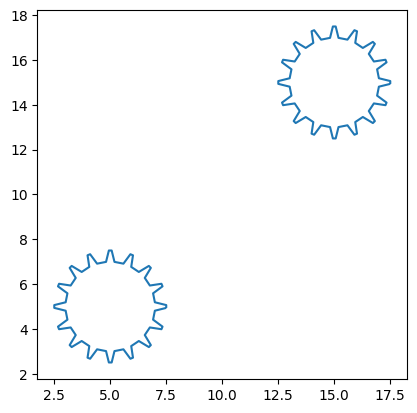

In [62]:
data.plot()